In [2]:
import pandas as pd


res = pd.read_csv('results_metrics_72h.csv')
res.head()

,Unnamed: 0,File,nhours,ssc,tad,dsi,nll,dist_mu_true,dist_centr_true,std,ssc_centroids,tad_centroids,ssc_means,tad_means
0,0,trace_ISMER_20140702_spot036_drift.yml,72,0.740788,14.492812,21.000270,1.857057,36.378443,25.365605,47.219805,0.683038,17.721700,0.551226,25.091440
1,1,trace_ISMER_20140702_spot216_drift.yml,72,0.694519,14.953295,20.816342,1.850928,40.583195,20.608181,43.198610,0.699543,14.707397,0.526580,23.173940
2,2,trace_ISMER_20140702_spot228_drift.yml,72,0.740788,14.492812,21.000270,1.856260,63.058508,24.827380,62.646817,0.670492,18.423179,0.297082,39.300895
3,3,trace_ISMER_20140706_spot073_drift.yml,72,0.860195,7.681598,11.107020,1.855741,50.939684,21.850921,38.686691,0.808711,10.510406,0.536563,25.463608
4,4,trace_ISMER_20140706_spot223_drift.yml,72,0.860195,7.681598,11.107020,1.852742,52.718129,18.688970,40.228583,0.827057,9.502353,0.533287,25.643570


In [3]:
res.mean(numeric_only=True)

Unnamed: 0        51.000000
nhours           172.728155
ssc                0.553060
tad               30.285907
nll                1.891655
ssc_centroids      0.555823
tad_centroids     30.232527
dtype: float64

In [3]:
res.describe()

,Unnamed: 0,nhours,ssc,tad,dsi,nll,dist_mu_true,dist_centr_true,std,ssc_centroids,tad_centroids,ssc_means,tad_means
count,63.000000,63.0,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,31.000000,72.0,0.467245,21.477968,31.877406,1.866100,37.847237,30.767117,27.242744,0.493319,20.275407,0.321649,27.513393
std,18.330303,0.0,0.240422,11.872355,22.746021,0.025502,21.514987,21.834697,18.482536,0.238870,11.851955,0.226562,10.738537
min,0.000000,72.0,0.000000,3.081678,2.834398,1.839127,3.103719,2.740422,0.197873,0.000000,5.798352,0.000000,10.183252
25%,15.500000,72.0,0.326156,12.614269,15.239917,1.850998,22.079131,15.610288,11.463335,0.323265,10.791003,0.144286,18.084184
50%,31.000000,72.0,0.482289,17.559204,23.031062,1.857057,34.980260,24.296171,26.525293,0.522725,16.925100,0.344671,26.026221
75%,46.500000,72.0,0.671881,32.987047,37.543237,1.885215,51.828907,37.621204,43.905842,0.690267,31.553127,0.534925,34.772214
max,62.000000,72.0,0.910286,50.070338,86.384049,1.988654,87.148956,86.921748,62.646817,0.858336,47.043373,0.704513,48.700206


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

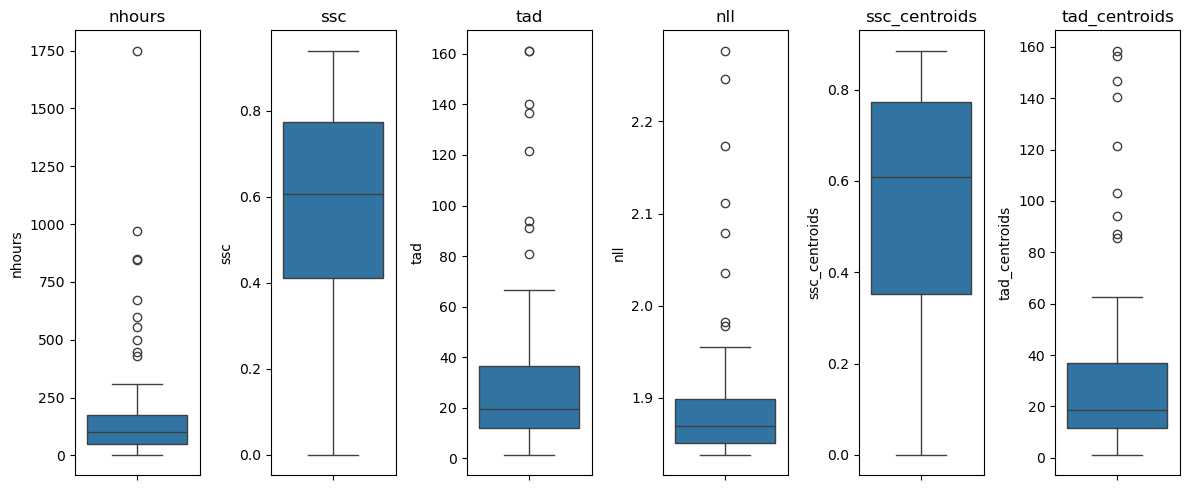

In [12]:
# Store the list of columns
columns_to_plot = ['nhours', 'ssc', 'tad', 'nll','ssc_centroids','tad_centroids']

# Create the figure and two subplots
fig, axes = plt.subplots(figsize = (12,5),ncols=len(columns_to_plot))

# Create the boxplot with Seaborn
for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=res[column], ax=axis) 
        axis.set_title(column)
        # axis.set(xticklabels=[], xticks=[], ylabel=column)

# Show the plot
plt.tight_layout()
plt.show()

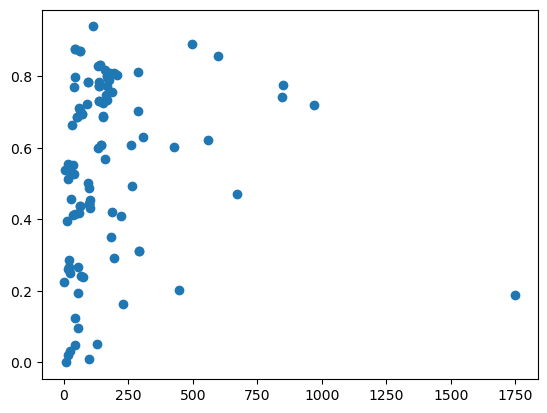

In [14]:
plt.scatter(res['nhours'],res['ssc'])

## Analyze all results


In [1]:
import numpy as np
import pandas as pd

In [2]:
def bootstrap(x,alpha=0.05):
    '''This function returns the 1-alpha% Confidence interval of the mean of x 
      using a bootstrapping approach with 10'000 samples'''
    np.random.seed(0)
    mean_vals = [np.random.choice(x,len(x)).mean() for _ in range(10000)]
    
    return np.quantile(mean_vals, alpha/2), np.quantile(mean_vals, 1-alpha/2)

In [26]:
res = pd.read_csv('results/results_metrics_72h.csv')
res.head()

,Unnamed: 0,File,nhours,ssc,tad,dsi,nll,anll,dist_mu_true,dist_centr_true,std,ssc_centroids,tad_centroids,ssc_means,tad_means
0,0,trace_ISMER_20140702_spot036_drift.yml,72,0.752088,14.193552,21.182626,1.885389,1.857690,42.049136,26.656510,50.080780,0.683150,18.140428,0.553371,25.570573
1,1,trace_ISMER_20140702_spot216_drift.yml,72,0.712388,14.423771,20.593038,1.871055,1.851937,53.202128,20.096797,50.733527,0.718722,14.106107,0.383194,30.932899
2,2,trace_ISMER_20140702_spot228_drift.yml,72,0.752088,14.193552,21.182626,1.882315,1.856442,48.797860,25.616393,55.332111,0.690126,17.741041,0.470422,30.319647
3,3,trace_ISMER_20140706_spot073_drift.yml,72,0.843524,8.839764,12.186682,1.886974,1.854586,51.957654,20.691075,38.648470,0.797008,11.467540,0.579096,23.777953
4,4,trace_ISMER_20140706_spot223_drift.yml,72,0.843524,8.839764,12.186682,1.883323,1.853725,74.251246,18.315168,54.468345,0.812842,10.573072,0.396048,34.118867


In [27]:
res.describe() #0.535 after 144h

,Unnamed: 0,nhours,ssc,tad,dsi,nll,anll,dist_mu_true,dist_centr_true,std,ssc_centroids,tad_centroids,ssc_means,tad_means
count,63.000000,63.0,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,31.000000,72.0,0.476446,21.692734,32.120390,1.889431,1.866071,36.815707,30.716234,23.310820,0.501847,20.493923,0.430836,23.483103
std,18.330303,0.0,0.240582,12.185177,22.907943,0.056439,0.025604,20.893339,21.692005,18.174678,0.239125,12.167197,0.209981,11.013919
min,0.000000,72.0,0.000000,3.538924,4.734598,1.839246,1.839180,5.657635,3.660843,0.200683,0.000000,3.874741,0.000000,5.677241
25%,15.500000,72.0,0.335166,12.546363,15.571203,1.859620,1.849914,22.792718,15.552648,8.450498,0.331793,11.069777,0.320365,16.085698
50%,31.000000,72.0,0.490034,17.838681,23.637664,1.873004,1.856687,32.331807,24.268055,19.846624,0.539146,17.105586,0.457653,20.275668
75%,46.500000,72.0,0.670202,33.493659,37.256228,1.895044,1.885842,51.121060,37.589815,36.094941,0.691002,32.241450,0.589855,33.476042
max,62.000000,72.0,0.900333,51.160954,86.913954,2.201598,1.988362,86.914755,86.910190,62.844037,0.890875,48.244650,0.816149,48.236725


In [28]:
a, b = bootstrap(res['anll'])
a,b, (b-a)/2

(1.8601778609598747, 1.8728383805396036, 0.006330259789864456)

In [4]:
def read_file_print_results(file):
    res = pd.read_csv(file)
    for colname in ['ssc','tad','dsi','nll','dist_mu_true','dist_centr_true','std','ssc_centroids','ssc_means']:
        col = res[colname]
        m = np.mean(col)
        a,b = bootstrap(col)
        ecart = (b-a)/2
        print('     ', colname,': ', m, ' [',a,',',b,'], ', ecart)
    return

In [5]:
print('=============Model A========================')
print('3h')
read_file_print_results('results/results_metrics_3h.csv')
print('6h')
read_file_print_results('results/results_metrics_6h.csv')
print('12h')
read_file_print_results('results/results_metrics_12h.csv')
print('24h')
read_file_print_results('results/results_metrics_24h.csv')
print('48h')
read_file_print_results('results/results_metrics_48h.csv')
print('72h')
read_file_print_results('results/results_metrics_72h.csv')



=============Model A========================
3h
      ssc :  0.3037691925874925  [ 0.2448262418360626 , 0.3659253275298168 ],  0.06054954284687711
      tad :  2.5097648967113395  [ 1.7477324243701584 , 3.567427053843652 ],  0.9098473147367468
      dsi :  3.5575218759409273  [ 2.6117473445131982 , 4.828372802266179 ],  1.1083127288764902
      nll :  1.8392210354087979  [ 1.8382657335251282 , 1.8406751186737191 ],  0.0012046925742954517
      dist_mu_true :  3.866297155217767  [ 2.93683627029319 , 5.121238430594591 ],  1.0922010801507005
      dist_centr_true :  3.5896988108698036  [ 2.6434419960756044 , 4.859391968845302 ],  1.107974986384849
      std :  1.8114003536224936  [ 1.596006523805549 , 2.0399525440613435 ],  0.22197301012789727
      ssc_centroids :  0.30796770423597336  [ 0.24865845774954298 , 0.36904985156129644 ],  0.06019569690587673
      ssc_means :  0.2359233282193741  [ 0.1876780709262364 , 0.2873095204483586 ],  0.04981572476106111
6h
      ssc :  0.32176235769337

In [16]:
print('=============Model B========================')
print('3h')
read_file_print_results('results/results_metrics_wind_only_3h.csv')
print('6h')
read_file_print_results('results/results_metrics_wind_only_6h.csv')
print('12h')
read_file_print_results('results/results_metrics_wind_only_12h.csv')
print('24h')
read_file_print_results('results/results_metrics_wind_only_24h.csv')
print('48h')
read_file_print_results('results/results_metrics_wind_only_48h.csv')
print('72h')
read_file_print_results('results/results_metrics_wind_only_72h.csv')

=============Model B========================
3h
      ssc :  0.22120779793766296  [ 0.17095467351772972 , 0.2744988022924556 ],  0.05177206438736294
      tad :  2.6185738434662453  [ 1.865338870780486 , 3.6798903224039354 ],  0.9072757258117247
      dsi :  3.72386643237853  [ 2.7983791951816515 , 5.0003938757033275 ],  1.101007340260838
      nll :  1.8391551152198369  [ 1.838234654329742 , 1.8405665630607968 ],  0.0011659543655273552
      dist_mu_true :  3.722202678452337  [ 2.7918850733556906 , 5.001928595988876 ],  1.105021761316593
      dist_centr_true :  3.725343709874126  [ 2.7982390598124067 , 5.001608800686365 ],  1.1016848704369793
      std :  0.49891346347435306  [ 0.454147906217559 , 0.5452544189181879 ],  0.04555325635031446
      ssc_centroids :  0.22144839837035765  [ 0.17149126584648564 , 0.27476985591954034 ],  0.05163929503652735
      ssc_means :  0.2224065644664429  [ 0.17270913011439226 , 0.2756075547555395 ],  0.05144921232057362
6h
      ssc :  0.256054980705

In [7]:
print('=============Model C========================')
print('3h')
read_file_print_results('results/results_metrics_stokes_3h.csv')
print('6h')
read_file_print_results('results/results_metrics_stokes_6h.csv')
print('12h')
read_file_print_results('results/results_metrics_stokes_12h.csv')
print('24h')
read_file_print_results('results/results_metrics_stokes_24h.csv')
print('48h')
read_file_print_results('results/results_metrics_stokes_48h.csv')
print('72h')
read_file_print_results('results/results_metrics_stokes_72h.csv')



=============Model C========================
3h
      ssc :  0.2562133768472615  [ 0.20074997343057355 , 0.31372330988487773 ],  0.05648666822715209
      tad :  2.530224004794827  [ 1.7749873491146548 , 3.593939950309436 ],  0.9094763005973905
      dsi :  3.5787649608858523  [ 2.654520662947313 , 4.872474615430767 ],  1.1089769762417272
      nll :  1.8392042435166263  [ 1.8382884404001842 , 1.8406098709697276 ],  0.001160715284771685
      dist_mu_true :  3.694636059092893  [ 2.7871641373910334 , 4.962152467139682 ],  1.0874941648743244
      dist_centr_true :  3.8425346366626716  [ 2.936414719843905 , 5.105546919315303 ],  1.0845660997356992
      std :  1.4223961036090038  [ 1.1985020780763398 , 1.6574318334043037 ],  0.22946487766398194
      ssc_centroids :  0.21872920625026612  [ 0.16718159431226584 , 0.27178375766351587 ],  0.052301081675625014
      ssc_means :  0.235480251116197  [ 0.18449833031449878 , 0.2892250672617177 ],  0.052363368473609465
6h
      ssc :  0.2907955322

## What traces are the worst?

In [38]:
res = pd.read_csv('results/results_metrics_72h.csv')
res.head()


,Unnamed: 0,File,nhours,ssc,tad,dsi,nll,anll,dist_mu_true,dist_centr_true,std,ssc_centroids,tad_centroids,ssc_means,tad_means
0,0,trace_ISMER_20140702_spot036_drift.yml,72,0.752088,14.193552,21.182626,1.885389,1.857690,42.049136,26.656510,50.080780,0.683150,18.140428,0.553371,25.570573
1,1,trace_ISMER_20140702_spot216_drift.yml,72,0.712388,14.423771,20.593038,1.871055,1.851937,53.202128,20.096797,50.733527,0.718722,14.106107,0.383194,30.932899
2,2,trace_ISMER_20140702_spot228_drift.yml,72,0.752088,14.193552,21.182626,1.882315,1.856442,48.797860,25.616393,55.332111,0.690126,17.741041,0.470422,30.319647
3,3,trace_ISMER_20140706_spot073_drift.yml,72,0.843524,8.839764,12.186682,1.886974,1.854586,51.957654,20.691075,38.648470,0.797008,11.467540,0.579096,23.777953
4,4,trace_ISMER_20140706_spot223_drift.yml,72,0.843524,8.839764,12.186682,1.883323,1.853725,74.251246,18.315168,54.468345,0.812842,10.573072,0.396048,34.118867


In [39]:

res[['File','ssc','dsi', 'ssc_centroids','ssc_means']].sort_values(ascending=[False,True], 
                                           by=['ssc', 'dsi']).head(10)


,File,ssc,dsi,ssc_centroids,ssc_means
14,trace_ISMER_20141022_spot243_drift.yml,0.900333,4.734598,0.890875,0.816149
3,trace_ISMER_20140706_spot073_drift.yml,0.843524,12.186682,0.797008,0.579096
4,trace_ISMER_20140706_spot223_drift.yml,0.843524,12.186682,0.812842,0.396048
16,trace_ISMER_20141024_spot074_drift.yml,0.769032,15.137438,0.826038,0.589434
17,trace_ISMER_20141024_spot208_drift.yml,0.769032,15.137438,0.851638,0.653154
0,trace_ISMER_20140702_spot036_drift.yml,0.752088,21.182626,0.683150,0.553371
2,trace_ISMER_20140702_spot228_drift.yml,0.752088,21.182626,0.690126,0.470422
27,trace_ISMER_20141029_spot206_drift.yml,0.750723,6.106075,0.791690,0.697958
19,trace_ISMER_20141024_spot219_drift.yml,0.741022,19.942900,0.826206,0.590276
15,trace_ISMER_20141024_spot064_drift.yml,0.725070,20.944352,0.881260,0.557986


In [19]:
import os
import pandas as pd
import yaml
from utils.read_data import *
from utils.param_alpha import update_alpha_GD
from models.linear_model import u_drift_linear_matrix
from utils.RK4 import compute_position
from metrics.metrics_trajectory import *
from metrics.metrics_probabilities import *

In [55]:
PATH_CONFIG = './configs_2/trace_ISMER_20141029_spot206_drift.yml'
with open(PATH_CONFIG, 'r') as f:
    config = yaml.safe_load(f)

# Get interpolated initial data
u10_interpolation, v10_interpolation = wind_interpolated(config['PATH_WIND'])
water_u_interpolation, water_v_interpolation = water_interpolated(config['PATH_WATER'])

# Get initial position & True positions
pos_1, time1 = get_initial_position(config['PATH_DRIFT']) 
true_lon, true_lat, true_time = get_true_drift_positions(config['PATH_DRIFT'])

# Get (integer) number of hours
#nhours = get_number_hours(true_time)
nhours = 72
# Get interpolated positions
true_lon_extrapolated, true_lat_extrapolated = get_extrapolated_true_position(config['PATH_DRIFT'], nhours)

# Compute one trajectory (without perturbation)
print('Computing trajectory')
alpha = update_alpha_GD(config['PATH_DRIFT'], water_u_interpolation, water_v_interpolation, u10_interpolation, v10_interpolation,alpha = 0.03, theta = 0.349066,  step=0.1, npoints=3)
u_drift = u_drift_linear_matrix(alpha, u10_interpolation, v10_interpolation,water_u_interpolation,water_v_interpolation)
longitudes, latitudes, time_final = compute_position(u_drift, pos_1, time1,1,nhours)

# Compute KDE & centroids & ALL
'''print('Computing KDEs')
L_vec, centroids_lons, centroids_lats, means_lons, means_lats, stds, dist_mean_true,dist_centroid_true = averaged_NLL_and_centroids(config['PATH_DRIFT'],water_u_interpolation, water_v_interpolation, u10_interpolation, v10_interpolation, Ntraj=200, nhours=nhours)
'''  

Computing trajectory


"print('Computing KDEs')\nL_vec, centroids_lons, centroids_lats, means_lons, means_lats, stds, dist_mean_true,dist_centroid_true = averaged_NLL_and_centroids(config['PATH_DRIFT'],water_u_interpolation, water_v_interpolation, u10_interpolation, v10_interpolation, Ntraj=200, nhours=nhours)\n"

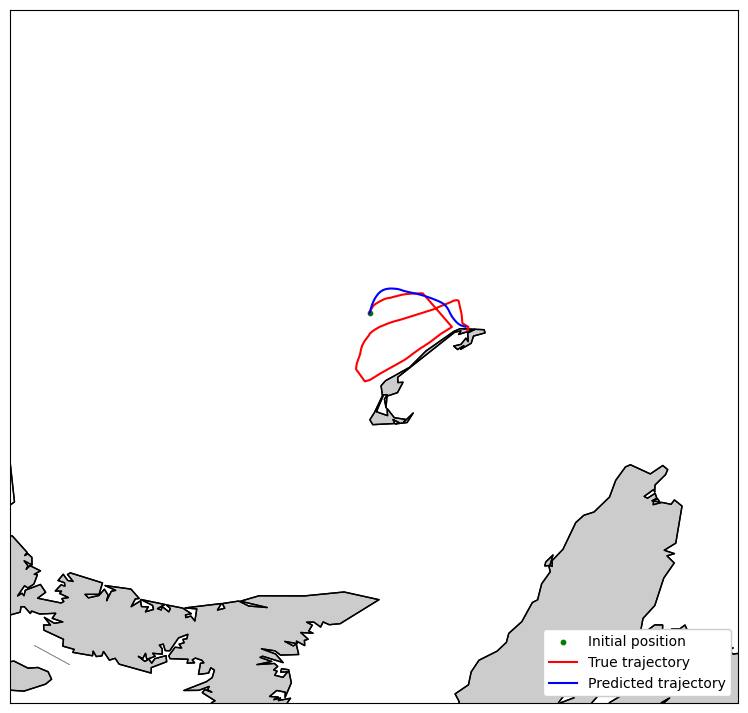

In [56]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# setting the size of the map
fig = plt.figure(figsize=(12,9))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -71, urcrnrlon = -63, resolution = 'i') #august2015
#m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i') 
#m = Basemap(projection = 'mill', llcrnrlat = 48, urcrnrlat = 52, llcrnrlon = -60, urcrnrlon = -56, resolution = 'i') #july2014
m = Basemap(projection = 'mill', llcrnrlat = config['min_lat'], urcrnrlat = config['max_lat'], llcrnrlon = config['min_lon'], urcrnrlon = config['max_lon'], resolution = 'i') #oct2014

# drawing the coastline
m.drawcoastlines()
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcoastlines()
m.fillcontinents()


# plotting the map
m.scatter(true_lon[0], true_lat[0], latlon = True, s = 10, c = 'g', marker = 'o', alpha = 1, label='Initial position')
m.plot(true_lon,true_lat,latlon=True,linewidth=1.5,color='r', label='True trajectory')
m.plot(longitudes,latitudes,latlon=True,linewidth=1.5,color='b', label='Predicted trajectory')
'''m.plot( centroids_lons, centroids_lats,latlon=True,linewidth=1.5,color='g', label='Centroids trajectory')
m.plot(means_lons, means_lats,latlon=True,linewidth=1.5,color='y', label='Means trajectory')'''



plt.legend(loc = 'lower right',framealpha=1)
plt.show()


## Results for filtered trajectories (keep only those far away from the shores)

In [14]:
import pickle

with open("traces_wo_shoring.txt", "rb") as fp:   # Unpickling
    list_traces_wo_shoring = pickle.load(fp)

In [15]:
len(list_traces_wo_shoring)

54

In [32]:
df_72 =  pd.read_csv('results/results_metrics_72h.csv')
list_72h = list(df_72["File"])

In [33]:
def read_file_print_results_filtered(file, list_files, list_72h):
    res = pd.read_csv(file)
    res = res[res['File'].isin(list_files)]
    res = res[res['File'].isin(list_72h)]
    print('Number of remaining traces:', len(res))
    for colname in ['ssc','tad','dsi','nll','dist_mu_true','dist_centr_true','std','ssc_centroids','ssc_means']:
        col = res[colname]
        m = np.mean(col)
        a,b = bootstrap(col)
        ecart = (b-a)/2
        print('     ', colname,': ', m, ' [',a,',',b,'], ', ecart)
    return

In [34]:
print('=============Model A========================')
print('3h')
read_file_print_results_filtered('results/results_metrics_3h.csv',list_traces_wo_shoring,list_72h)
print('6h')
read_file_print_results_filtered('results/results_metrics_6h.csv',list_traces_wo_shoring,list_72h)
print('12h'),
read_file_print_results_filtered('results/results_metrics_12h.csv',list_traces_wo_shoring,list_72h)
print('24h')
read_file_print_results_filtered('results/results_metrics_24h.csv',list_traces_wo_shoring,list_72h)
print('48h')
read_file_print_results_filtered('results/results_metrics_48h.csv',list_traces_wo_shoring,list_72h)
print('72h')
read_file_print_results_filtered('results/results_metrics_72h.csv',list_traces_wo_shoring,list_72h)



=============Model A========================
3h
Number of remaining traces: 37
      ssc :  0.44130407835950225  [ 0.3402891282279968 , 0.5385720589501939 ],  0.09914146536109855
      tad :  1.2605846203606987  [ 1.1000729979643202 , 1.4253510034244699 ],  0.1626390027300748
      dsi :  1.8926908761304069  [ 1.638805032833634 , 2.160821815424597 ],  0.2610083912954815
      nll :  1.8381589403789251  [ 1.8380839237068676 , 1.838247289679741 ],  8.168298643673744e-05
      dist_mu_true :  2.5374892357747654  [ 2.1178232832959725 , 3.0273850224593764 ],  0.45478086958170194
      dist_centr_true :  2.0052661510408996  [ 1.7125238913956116 , 2.3188808768141147 ],  0.30317849270925157
      std :  2.459229064694823  [ 2.13000597350166 , 2.832816539257665 ],  0.35140528287800255
      ssc_centroids :  0.436375140064241  [ 0.33532415538481936 , 0.5331640370507005 ],  0.09891994083294056
      ssc_means :  0.2966382499594597  [ 0.21329688069080308 , 0.38185663178472806 ],  0.084279875546962

In [35]:
print('=============Model B========================')
print('3h')
read_file_print_results_filtered('results/results_metrics_stokes_3h.csv',list_traces_wo_shoring,list_72h)
print('6h')
read_file_print_results_filtered('results/results_metrics_stokes_6h.csv',list_traces_wo_shoring,list_72h)
print('12h'),
read_file_print_results_filtered('results/results_metrics_stokes_12h.csv',list_traces_wo_shoring,list_72h)
print('24h')
read_file_print_results_filtered('results/results_metrics_stokes_24h.csv',list_traces_wo_shoring,list_72h)
print('48h')
read_file_print_results_filtered('results/results_metrics_stokes_48h.csv',list_traces_wo_shoring,list_72h)
print('72h')
read_file_print_results_filtered('results/results_metrics_stokes_72h.csv',list_traces_wo_shoring,list_72h)



=============Model B========================
3h
Number of remaining traces: 37
      ssc :  0.4380203383622206  [ 0.34075832565475267 , 0.5320970962111939 ],  0.09566938527822064
      tad :  1.3124686627363755  [ 1.0753144047644112 , 1.6086969817280112 ],  0.2666912884818
      dsi :  1.966072625239492  [ 1.6309148331203485 , 2.3664985611344522 ],  0.3677918640070519
      nll :  1.8382471439977168  [ 1.8381442184949426 , 1.8383698275906126 ],  0.00011280454783502147
      dist_mu_true :  2.349503477854427  [ 2.0117414573854475 , 2.690059680243211 ],  0.33915911142888167
      dist_centr_true :  2.497117953770341  [ 2.135628294090663 , 2.8700729212462677 ],  0.36722231357780233
      std :  2.364323540770429  [ 2.08549055780541 , 2.6756084172095886 ],  0.29505892970208936
      ssc_centroids :  0.35429204165346234  [ 0.2626232479204895 , 0.4469007637507579 ],  0.09213875791513418
      ssc_means :  0.36554559750784554  [ 0.277301763228922 , 0.4543474440555257 ],  0.08852284041330183
6

In [37]:
print('=============Model C========================')
print('3h')
read_file_print_results_filtered('results/results_metrics_wind_only_3h.csv',list_traces_wo_shoring,list_72h)
print('6h')
read_file_print_results_filtered('results/results_metrics_wind_only_6h.csv',list_traces_wo_shoring,list_72h)
print('12h'),
read_file_print_results_filtered('results/results_metrics_wind_only_12h.csv',list_traces_wo_shoring,list_72h)
print('24h')
read_file_print_results_filtered('results/results_metrics_wind_only_24h.csv',list_traces_wo_shoring,list_72h)
print('48h')
read_file_print_results_filtered('results/results_metrics_wind_only_48h.csv',list_traces_wo_shoring,list_72h)
print('72h')
read_file_print_results_filtered('results/results_metrics_wind_only_72h.csv',list_traces_wo_shoring,list_72h)



=============Model C========================
3h
Number of remaining traces: 37
      ssc :  0.3666150031244963  [ 0.2746416493253254 , 0.4574687546978405 ],  0.09141355268625753
      tad :  1.4614840072764184  [ 1.253834273023079 , 1.6671920435453267 ],  0.20667888526112388
      dsi :  2.2008055061768843  [ 1.887723269435273 , 2.5128557368071487 ],  0.31256623368593783
      nll :  1.838116305816353  [ 1.8380524829260236 , 1.8381838648700755 ],  6.569097202591134e-05
      dist_mu_true :  2.199348886786622  [ 1.8792748392536136 , 2.517150116461621 ],  0.3189376386040036
      dist_centr_true :  2.202599026141217  [ 1.8895087047292771 , 2.5149538297821183 ],  0.3127225625264206
      std :  0.7048609385767407  [ 0.6896602965663811 , 0.7204427872555087 ],  0.01539124534456382
      ssc_centroids :  0.3664618329755814  [ 0.27479496876827636 , 0.4566434148706526 ],  0.09092422305118811
      ssc_means :  0.3649149361161879  [ 0.273017006564828 , 0.4548216604654271 ],  0.09090232695029954